In [20]:
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

# 1) JSON direkt einlesen (Liste von Dicts)
df_4_1 = pd.read_json("log_files/gpt-4.1_v6_openai_embedding.json")
#df_o_4 = pd.read_json("log_files/o4-mini_embedding_approach_v1.json")

def preprocess_df(df):
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    for col in ["dqr_original","dqr_predict","prompt_tokens","completion_tokens"]:
        df[col] = pd.to_numeric(df[col])

    #df.drop('prompt_tokens', axis=1, inplace=True)
    df.drop('completion_tokens', axis=1, inplace=True)
    df['correct_pred'] = df['dqr_original'] == df['dqr_predict']

preprocess_df(df_4_1)


In [21]:
print(f"{sum(df_4_1['estimated_costs'])} €")
print(f"{sum(df_4_1['estimated_costs']) / 165 * 4500} €")
df_4_1

1.402985999999976 €
38.26325454545389 €


,ID,timestamp,model,vorname,nachname,dqr_original,comment_original,dqr_predict,comment_predict,confidence_score,prompt_tokens,estimated_costs,retrieved_content,correct_pred
0,#001,2025-08-24 13:39:44.456866,gpt-4.1,Joschka,Fischer,3,Mittlerer Schulabschluss,0,Keine Angabe zum Bildungsabschluss (explizit: ...,NaN,4922,0.010004,Projekt der Nord-Stream-Pipeline warb.[40][41]...,False
1,#002,2025-08-24 13:39:45.694206,gpt-4.1,Hans,Klein,3,Mittlerer Schulabschluss,4,Mittlere Reife und Schriftsetzerlehre,3.0,3349,0.006818,Klein kam 1945 als Heimatvertriebener aus dem ...,False
2,#003,2025-08-24 13:39:47.118622,gpt-4.1,Alex,Möller,3,Mittlerer Schulabschluss (MSA),0,Keine Angabe zum Bildungsabschluss (vermutlich...,NaN,4733,0.009602,Herkunft und beruflicher Werdegang (bis 1945)[...,False
3,#006,2025-08-24 13:39:48.344515,gpt-4.1,Theodor,Blank,4,Theodor Blank,8,Dr. jur. (Promotion in Rechtswissenschaften),3.0,3204,0.006528,Joseph-Theodor Blank wuchs im ehemaligen Stadt...,False
4,#007,2025-08-24 13:39:50.188662,gpt-4.1,Kurt,Bodewig,4,Fachgebundene Hochschulreife,4,Fachabitur (Fachhochschulreife) Wirtschaft,3.0,3337,0.006818,Nach der Mittleren Reife begann Bodewig eine A...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,#190,2025-08-24 14:01:14.727120,gpt-4.1,Karl,Weber,8,Dr. jur.,8,Dr. der Rechte (Promotion Jura),3.0,3037,0.006170,Nach dem Abitur 1916 nahm Weber zunächst als S...,True
161,#191,2025-08-24 14:01:25.445993,gpt-4.1,Guido,Westerwelle,8,Dr. jur.,8,Dr. iur. (Promotion in Rechtswissenschaft),3.0,4887,0.009894,Kindheit und Ausbildung[Bearbeiten | Quelltext...,True
162,#193,2025-08-24 14:01:31.275349,gpt-4.1,Dorothee,Wilms,8,Dr. rer. pol.,8,Dr. rer. pol. (Promotion in Volkswirtschaftsle...,3.0,3235,0.006614,Wilms wurde 1929 als einziges Kind von Lorenz ...,True
163,#194,2025-08-24 14:01:41.422308,gpt-4.1,Manfred,Wörner,8,Dr. jur.,8,Dr. jur. (Promotion in Rechtswissenschaft),3.0,5142,0.010396,"Herkunft, Studium und Beruf[Bearbeiten | Quell...",True


In [22]:
df_4_1_false = df_4_1[df_4_1['correct_pred'] == False]
df_4_1_false

,ID,timestamp,model,vorname,nachname,dqr_original,comment_original,dqr_predict,comment_predict,confidence_score,prompt_tokens,estimated_costs,retrieved_content,correct_pred
0,#001,2025-08-24 13:39:44.456866,gpt-4.1,Joschka,Fischer,3,Mittlerer Schulabschluss,0,Keine Angabe zum Bildungsabschluss (explizit: ...,NaN,4922,0.010004,Projekt der Nord-Stream-Pipeline warb.[40][41]...,False
1,#002,2025-08-24 13:39:45.694206,gpt-4.1,Hans,Klein,3,Mittlerer Schulabschluss,4,Mittlere Reife und Schriftsetzerlehre,3.0,3349,0.006818,Klein kam 1945 als Heimatvertriebener aus dem ...,False
2,#003,2025-08-24 13:39:47.118622,gpt-4.1,Alex,Möller,3,Mittlerer Schulabschluss (MSA),0,Keine Angabe zum Bildungsabschluss (vermutlich...,NaN,4733,0.009602,Herkunft und beruflicher Werdegang (bis 1945)[...,False
3,#006,2025-08-24 13:39:48.344515,gpt-4.1,Theodor,Blank,4,Theodor Blank,8,Dr. jur. (Promotion in Rechtswissenschaften),3.0,3204,0.006528,Joseph-Theodor Blank wuchs im ehemaligen Stadt...,False
14,#017,2025-08-24 13:40:43.336932,gpt-4.1,Hannelore,Rönsch,4,Fachhochschulreife,3,Mittlere Reife und Höhere Handelsschule,3.0,3723,0.007566,Rönschs Vater war Landwirt und Winzer. Er star...,False
19,#022,2025-08-24 13:41:24.602986,gpt-4.1,Richard,Stücklen,4,Ausbildung Elektroingenieur,6,Abschluss als Elektroingenieur an der Ingenieu...,3.0,4259,0.008670,Richard Stücklen wurde als Sohn des Schlosserm...,False
37,#047,2025-08-24 13:43:47.961903,gpt-4.1,Herta,Däubler-Gmelin,7,2tes Staatsexam Rechtswissenschaften,8,Dr. jur. (Promotion in Rechtswissenschaft),3.0,4035,0.008182,Herta Däubler-Gmelin ist die Tochter von Helge...,False
42,#054,2025-08-24 13:44:28.206422,gpt-4.1,Andrea,Fischer,7,Diplom Volkswirtschaftslehre (Univ.),6,Studium der Volkswirtschaftslehre abgeschlosse...,3.0,3840,0.007824,Ausbildung und Beruf[Bearbeiten | Quelltext be...,False
52,#066,2025-08-24 13:45:53.856260,gpt-4.1,Ignaz,Kiechle,7,Landwirtschaftlicher Lehrmeister,6,Landwirtschaftsmeister (Meisterprüfung 1960),3.0,3417,0.006954,Nach dem Besuch der Volksschule absolvierte Ki...,False
60,#075,2025-08-24 13:47:12.656164,gpt-4.1,Ernst,Lemmer,7,Studium Volkswirtschaft,6,"Studium an Universität, kein Abschluss genannt",2.0,4275,0.008646,Lemmer wurde als Sohn des Bauunternehmers und ...,False


In [23]:
#"""

#Achtung: Das hier nur einmal auführen vor dem manuellen Anreichern und danach nciht mehr, um die Datei nicht zu überschreiben!

# Funktion zum Speichern des df_4_1_false als JSON
def save_false_predictions_to_json(df_false, filename):
    output_path = f"log_files/{filename}"
    
    # DataFrame zu JSON konvertieren und speichern
    df_false.to_json(output_path, orient='records', indent=2, force_ascii=False)
        
    return output_path

# DataFrame als JSON speichern
df_false_enriched_4_1 = save_false_predictions_to_json(df_4_1_false, "gpt-4.1_false_predictions_v6.json")
#"""

In [27]:
df_false_enriched_4_1 = pd.read_json("log_files/gpt-4.1_false_predictions_v6.json")
df_false_enriched_4_1

,ID,timestamp,model,vorname,nachname,dqr_original,comment_original,dqr_predict,comment_predict,confidence_score,prompt_tokens,estimated_costs,retrieved_content,correct_pred,correct_retrieval,mistake_reason
0,#001,2025-08-24 13:39:44.456,gpt-4.1,Joschka,Fischer,3,Mittlerer Schulabschluss,0,Keine Angabe zum Bildungsabschluss (explizit: ...,NaN,4922,0.010004,Projekt der Nord-Stream-Pipeline warb.[40][41]...,False,True,actually_correct
1,#002,2025-08-24 13:39:45.694,gpt-4.1,Hans,Klein,3,Mittlerer Schulabschluss,4,Mittlere Reife und Schriftsetzerlehre,3.0,3349,0.006818,Klein kam 1945 als Heimatvertriebener aus dem ...,False,True,actually_correct
2,#003,2025-08-24 13:39:47.118,gpt-4.1,Alex,Möller,3,Mittlerer Schulabschluss (MSA),0,Keine Angabe zum Bildungsabschluss (vermutlich...,NaN,4733,0.009602,Herkunft und beruflicher Werdegang (bis 1945)[...,False,True,wiki_data
3,#006,2025-08-24 13:39:48.344,gpt-4.1,Theodor,Blank,4,Theodor Blank,8,Dr. jur. (Promotion in Rechtswissenschaften),3.0,3204,0.006528,Joseph-Theodor Blank wuchs im ehemaligen Stadt...,False,True,actually_correct
4,#017,2025-08-24 13:40:43.336,gpt-4.1,Hannelore,Rönsch,4,Fachhochschulreife,3,Mittlere Reife und Höhere Handelsschule,3.0,3723,0.007566,Rönschs Vater war Landwirt und Winzer. Er star...,False,True,wiki_data
5,#022,2025-08-24 13:41:24.602,gpt-4.1,Richard,Stücklen,4,Ausbildung Elektroingenieur,6,Abschluss als Elektroingenieur an der Ingenieu...,3.0,4259,0.008670,Richard Stücklen wurde als Sohn des Schlosserm...,False,True,actually_correct
6,#047,2025-08-24 13:43:47.961,gpt-4.1,Herta,Däubler-Gmelin,7,2tes Staatsexam Rechtswissenschaften,8,Dr. jur. (Promotion in Rechtswissenschaft),3.0,4035,0.008182,Herta Däubler-Gmelin ist die Tochter von Helge...,False,True,actually_correct
7,#054,2025-08-24 13:44:28.206,gpt-4.1,Andrea,Fischer,7,Diplom Volkswirtschaftslehre (Univ.),6,Studium der Volkswirtschaftslehre abgeschlosse...,3.0,3840,0.007824,Ausbildung und Beruf[Bearbeiten | Quelltext be...,False,True,actually_correct
8,#066,2025-08-24 13:45:53.856,gpt-4.1,Ignaz,Kiechle,7,Landwirtschaftlicher Lehrmeister,6,Landwirtschaftsmeister (Meisterprüfung 1960),3.0,3417,0.006954,Nach dem Besuch der Volksschule absolvierte Ki...,False,True,actually_correct
9,#075,2025-08-24 13:47:12.656,gpt-4.1,Ernst,Lemmer,7,Studium Volkswirtschaft,6,"Studium an Universität, kein Abschluss genannt",2.0,4275,0.008646,Lemmer wurde als Sohn des Bauunternehmers und ...,False,True,wiki_data


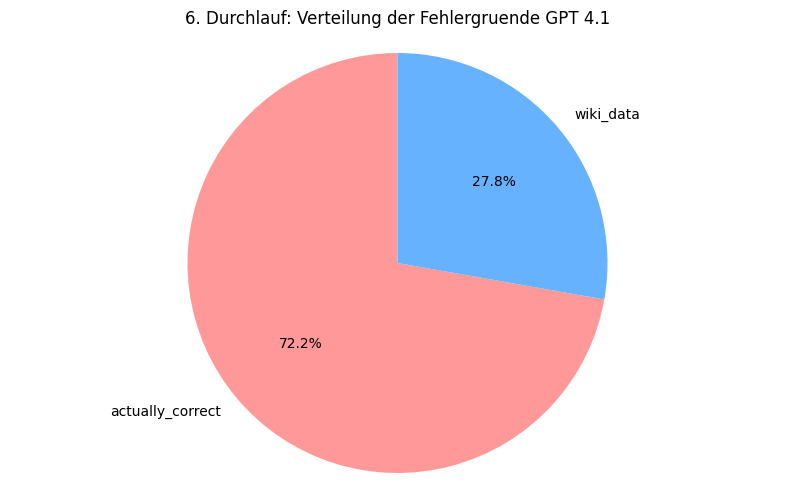

In [29]:
# Visualisierung 2: Fehlergrund-Verteilung
mistake_counts = df_false_enriched_4_1['mistake_reason'].value_counts()

plt.figure(figsize=(10, 6))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
plt.pie(mistake_counts, labels=mistake_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('6. Durchlauf: Verteilung der Fehlergruende GPT 4.1')
plt.axis('equal')
plt.show()